<h2> Lab 3: <br>
Analysis of Race Based Police Homicide Rate Across the Country</h2>


Code created by: Andrew Gladden and David Kahn <br>
Analysis written by: David Kahn <br>
10/20/2016
<br>
<br>



### Part 2:

Highest rate for black police killings: 0.00283 % DC


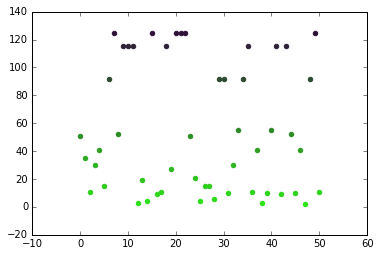

In [7]:
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as ss
% matplotlib inline
POP = open("states.csv", "r", errors="ignore");
PVC = open("PoliceViolence_city.csv", "r", errors="ignore");
KBP = open("KilledByPolice.csv", "r", errors="ignore");


cur = [];
cur2 = [];
cur3 = [];

for aa in PVC:
    cur.append(aa);
for ab in KBP:
    cur2.append(ab);
for ac in POP:
    cur3.append(ac);

del cur2[0];
del cur[0];

for ba in range(len(cur)):
    cur[ba] = cur[ba].split(",");
for bb in range(len(cur2)):
    cur2[bb] = cur2[bb].split(",");
for bc in range(len(cur3)):
    cur3[bc] = cur3[bc].split(",");


#VCR = violent crime rate
sacrob = {};
sacroo = {};
sacrot = {};
spop = {};
comp = [];

for c in range(len(cur2)):
    if cur2[c][7] not in sacrob and cur2[c][3] == "Black":
        sacrob[cur2[c][7]] = 1;
    elif cur2[c][7] in sacrob and cur2[c][3] == "Black":
        sacrob[cur2[c][7]]+=1;
    elif cur2[c][7] not in sacrob:
        sacrob[cur2[c][7]] = 0;
        
for d in range(len(cur2)):
    if cur2[d][7] not in sacroo and cur2[d][3] != "Black":
        sacroo[cur2[d][7]] = 1;
    elif cur2[d][7] in sacroo and cur2[d][3] != "Black":
        sacroo[cur2[d][7]]+=1;
    elif cur2[d][7] not in sacroo:
        sacroo[cur2[d][7]] = 0;
    
for e in range(len(cur2)):
    if cur2[e][7] not in sacrot:
        sacrot[cur2[e][7]] = 1;
    elif cur2[e][7] in sacrot:
        sacrot[cur2[e][7]]+=1;

colr = np.random.rand(3);

for f in range(len(sacrob)):
    y = sacrob[cur2[f][7]];
    cy = y;
    cny = y;
    cny = math.fabs(1-(cny/150+0.1));
    cy = cy/1000+0.1;
    colr[1] = cny;
    colr[2] = cy;
    plt.scatter(f, y, color = colr);

for g in range(len(sacroo)):
    y = sacroo[cur2[g][7]];
    cy = y;
    cny = y;
    cny = math.fabs(1-(cny/150+0.1));
    tick = 0;
    while cny > 1:
        if tick < 10:
            cny = (cny-1)*10;
            #print(cny);
            tick+=1;
        else:
            cny = cny%1;
            #print(cny);
    rny = 1-float(colr[1]);
    cy = cy/1000+0.1;
    #colr[0] = rny;
    colr[1] = cny;
    colr[2] = cy;

#Following Code copied from http://code.activestate.com/recipes/578114-round-number-to-specified-number-of-significant-di/
#Created by user Ben Hoyt
def round_sigfigs(num, sig_figs):
    if num != 0:
        return round(num, -int(math.floor(math.log10(abs(num))) - (sig_figs - 1)))
    else:
        return 0  # Can't take the log of 0
    
for h in range(len(cur3)):
    if cur3[h][1] not in spop:
        spop[cur3[h][1]] = int(cur3[h][2]);
for i in range(len(sacrob)):
    name = str(cur3[i][1]);
    killed = int(sacrob[name]);
    tp = int(spop[name]);
    #print(round_sigfigs(killed/tp*100, 3), "  State:", name, "Index:", i);
    comp.append(round_sigfigs(killed/tp*100, 3));

co1 = 0.0;
co2 = 0.0;
high = 0.0;
name = "";
for j in sacrob:
    co1 = round_sigfigs(int(sacrob[j])/int(spop[j])*100, 3);
    if co1 > high:
        high = co1;
        name = j;

print("Highest rate for black police killings:", high, "%", name);

In the previous graph we can see in which state are you most likely to be killed by police if you are black. It was found that the District of Colombia has the highest percentage of police killings on black people with 0.0028% of the black population being killed by police officers. It can also be seen that there are many states that have a very low percentage of police killings of black people (approx. 20 states below 20 killings). However, it does seem that there are numbers spread all over the board with the exception of 60-80. meaning that there is a relatively even coverage from the states of the number of people killed, with the exception that no states seem to be placed in the 60-80 people range.
<br>
<br>
<br>
<br>

Highest rate for police killings of all races: 0.00364 % NM


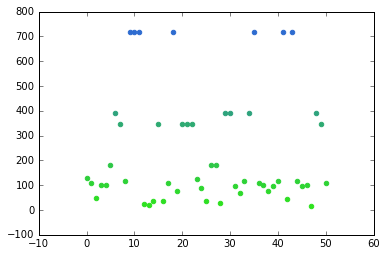

In [8]:
for f in range(len(sacrot)):
    y = sacrot[cur2[f][7]];
    cy = y;
    cny = y;
    cny = math.fabs(1-(cny/1500+0.1));
    cy = cy/1000+0.1;
    colr[1] = cny;
    colr[2] = cy;
    plt.scatter(f, y, color = colr);

for j in sacrot:
    co1 = round_sigfigs(int(sacrot[j])/int(spop[j])*100, 3);
    if co1 > high:
        high = co1;
        name = j;

print("Highest rate for police killings of all races:", high, "%", name);

In the previous graph we can see in which state are you most likely to be killed by police if you are of any race. It was found that the highest number of people killed by police officers, was in New Mexico with 0.00364%. This higher rate could possibly be attributed to a not as well trained police force as other states, or possibly a culture that more lenient to violence, or even possibly a smaller total population that would make an otherwise small percentage in other states, seem larger. It cannot be said for certain what the reason for this is. 

One thing to not from the graph, is that there are 3 distinct ranges for states. It seems that on the lower end of the spectrum, a state is in the range of 0-200 police killings. In the middle part of the spectrum, it seems that the numbers stay between 300-400 police killings, and in the upper part of the spectrum, it appears that the police killings are about 700. These ranges leave out 200-300 and 400-700. A possible reason for this could be 3 distinct ways that police are taught to handle situations. One way could be taught as more aggressive, while another more docile.